Obtain the dataset of current fuel prices from datos.gob.ar.

Analyze the information and answer the following questions:

a. Where are the highest prices? And the lowest?

b. What is the average price of each fuel in Argentina?

c. Which company sells CNG at the lowest price? Where is it located?

d. What is the average price of premium gasoline in each province?

In [194]:
# libraries 
import pandas as pd

In [195]:
# paths
path_fuel = 'C:/Users/huck_/Documents/Data Analysis Portfolio/fuel_prices'
fname = 'precios-en-surtidor.csv'
fullname = path_fuel + '/'+ fname

In [196]:
# install chardet
# !pip install chardet

In [197]:
# open file in binary mode to read its raw bytes
import chardet 
with open(fullname, 'rb') as f:
    raw_data = f.read()

# chardet.detect() guess the encoding
result = chardet.detect(raw_data)

# detected encoding is in the 'encoding' key of the result dictionary
detected_encoding = result['encoding']
print(f"Detected encoding: {detected_encoding}")

Detected encoding: Windows-1252


In [198]:
# open dataframe
df = pd.read_csv(fullname, sep = ',', encoding= detected_encoding)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37795 entries, 0 to 37794
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indice_tiempo     37795 non-null  object 
 1   idempresa         292 non-null    float64
 2   cuit              292 non-null    object 
 3   empresa           292 non-null    object 
 4   direccion         292 non-null    object 
 5   localidad         292 non-null    object 
 6   provincia         292 non-null    object 
 7   region            54 non-null     object 
 8   idproducto        292 non-null    float64
 9   producto          292 non-null    object 
 10  idtipohorario     292 non-null    float64
 11  tipohorario       292 non-null    object 
 12  precio            292 non-null    float64
 13  fecha_vigencia    292 non-null    object 
 14  idempresabandera  292 non-null    float64
 15  empresabandera    292 non-null    object 
 16  latitud           0 non-null      float6

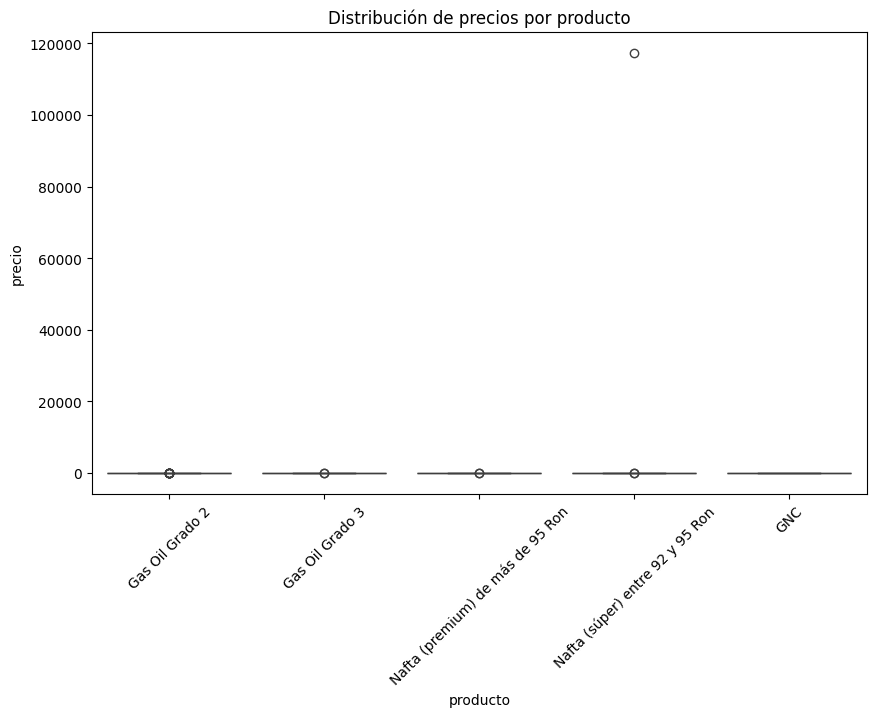

In [199]:
# check outlieds
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='producto', y='precio')
plt.xticks(rotation=45)
plt.title("Distribución de precios por producto")
plt.show()


In [200]:
# delete outliers 
media = df['precio'].mean()
desv = df['precio'].std()

df = df[(df['precio'] >= media - 3 * desv) & (df['precio'] <= media + 3 * desv)]


In [201]:
# columns I'm going to work with
util_columns = ['empresa', 'localidad', 'provincia', 'region', 'producto', 'precio']
df = df[util_columns]

In [202]:
df.head()

,empresa,localidad,provincia,region,producto,precio
36,2MIL10Y7 SRL,LUJAN,BUENOS AIRES,NaN,Gas Oil Grado 2,95.6
37,2MIL10Y7 SRL,LUJAN,BUENOS AIRES,NaN,Gas Oil Grado 2,95.6
38,2MIL10Y7 SRL,LUJAN,BUENOS AIRES,NaN,Gas Oil Grado 3,113.2
39,2MIL10Y7 SRL,LUJAN,BUENOS AIRES,NaN,Gas Oil Grado 3,113.2
40,2MIL10Y7 SRL,LUJAN,BUENOS AIRES,NaN,Nafta (premium) de más de 95 Ron,114.9


In [203]:
df_filtered = df.copy()
df_filtered = df_filtered[util_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 36 to 33640
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   empresa    291 non-null    object 
 1   localidad  291 non-null    object 
 2   provincia  291 non-null    object 
 3   region     54 non-null     object 
 4   producto   291 non-null    object 
 5   precio     291 non-null    float64
dtypes: float64(1), object(5)
memory usage: 15.9+ KB


In [204]:
df_filtered.dropna(axis = 0,how = 'any', inplace= True)
df_filtered.head(2)

,empresa,localidad,provincia,region,producto,precio
1140,ALGAVI SA,CAPITAL FEDERAL,CAPITAL FEDERAL,PAMPEANA,Gas Oil Grado 2,107.8
1141,ALGAVI SA,CAPITAL FEDERAL,CAPITAL FEDERAL,PAMPEANA,Gas Oil Grado 2,107.8


The highest price

In [205]:
row_max = df_filtered.loc[df_filtered['precio'].idxmax(), ['localidad', 'provincia', 'precio']]
row_max
print(f'El mayor precio es $AR {row_max.precio} en la localidad de {row_max.localidad}, provincia de {row_max.provincia}')

El mayor precio es $AR 144.5 en la localidad de CORDOBA, provincia de CORDOBA


The lowest price

In [206]:
row_min = df_filtered.loc[df_filtered['precio'].idxmin(), ['localidad', 'provincia', 'precio']]
print(f'El precio mínimo es $AR {row_min.precio} en la localidad de {row_min.localidad} en la provincia de {row_min.provincia}')

El precio mínimo es $AR 46.97 en la localidad de TICINO en la provincia de CORDOBA


The average price of fuel in Argentina

In [207]:
print(f'The average price of fuel in Argentina is: $AR {df_filtered['precio'].mean():.2f}')

The average price of fuel in Argentina is: $AR 104.50


Company which sells CNG at the lowest price and where is it located

In [208]:
gnc = df_filtered[df_filtered['producto'].str.upper() == 'GNC']

min_price = gnc['precio'].min()

localidad_precio_min = df_filtered[df_filtered['precio'] == min_price][['localidad', 'precio', 'provincia']]

print('El GNC a precio mínimo se vende en: ') 
localidad_precio_min

El GNC a precio mínimo se vende en: 


,localidad,precio,provincia
8191,SAN MIGUEL DE TUCUMAN,53.95,TUCUMAN
8192,SAN MIGUEL DE TUCUMAN,53.95,TUCUMAN


Average price of each fuel in Argentina

In [209]:
fuels_average = (df_filtered.groupby('producto')['precio'].mean()).to_dict()
for key, value in fuels_average.items():
    print(f'Combustible: {key}, precio: $AR {value:.2f}')



Combustible: GNC, precio: $AR 61.91
Combustible: Gas Oil Grado 2, precio: $AR 97.00
Combustible: Gas Oil Grado 3, precio: $AR 118.37
Combustible: Nafta (premium) de más de 95 Ron, precio: $AR 121.78
Combustible: Nafta (súper) entre 92 y 95 Ron, precio: $AR 102.15


Average price of premium gasoline in each province

In [210]:
# differents products in each province
df_filtered['producto'].unique()

array(['Gas Oil Grado 2', 'Gas Oil Grado 3',
       'Nafta (premium) de más de 95 Ron',
       'Nafta (súper) entre 92 y 95 Ron', 'GNC'], dtype=object)

In [211]:
# average price of premium gasoline
gasoline_average_province = df_filtered.groupby('provincia')['precio'].mean().to_dict()
for key, value in gasoline_average_province.items():
    print(f'Provincia: {key}, precio: $AR {value:.2f}')

Provincia: CAPITAL FEDERAL, precio: $AR 121.30
Provincia: CORDOBA, precio: $AR 85.81
Provincia: CORRIENTES, precio: $AR 116.30
Provincia: TUCUMAN, precio: $AR 112.56


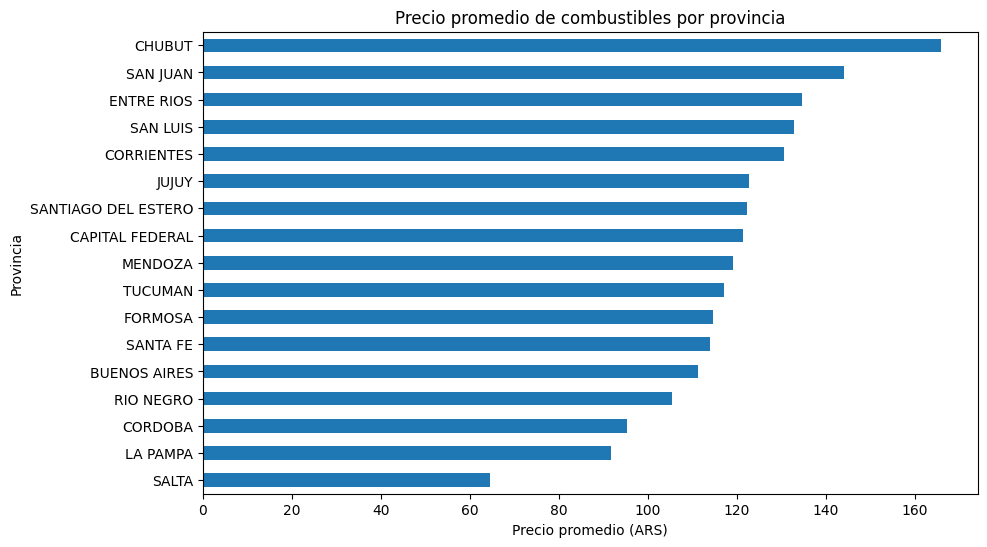

In [ ]:
# price of fuels for province
import matplotlib.pyplot as plt

df.groupby('provincia')['precio'].mean().sort_values().plot(kind='barh', figsize=(10,6))
plt.xlabel("Precio promedio (ARS)")
plt.ylabel("Provincia")
plt.title("Precio promedio de combustibles por provincia")
plt.show()
